In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import numpy as np
import defmod as dm
import defmod.multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.registrationdata as regdata
import defmod.hamiltonian_multishape as hamiltonian
from defmod.energyfunctional import EnergyFunctional_unconstrained, EnergyFunctional
from defmod import optimize
import defmod.save_results as results



torch.set_default_tensor_type(torch.DoubleTensor)

In [2]:
data = regdata.Multi_Nuts()
data()
source = data.source
target = data.target

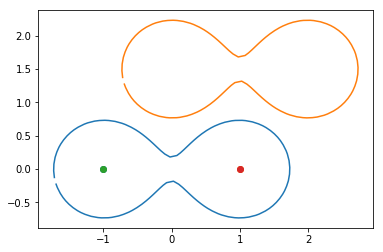

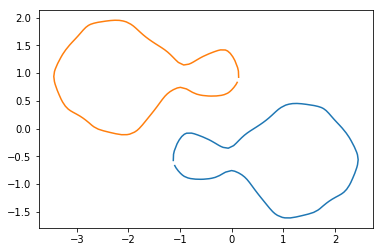

In [3]:
gd0 = [data.modules[i].manifold[1].gd.view(-1,2) for i in range(2)]
gd1 = [data.modules[i].manifold[2].gd.view(-1,2) for i in range(2)]

plt.figure()
for i in range(2):
    plt.plot(source[i].detach().numpy()[:,0], source[i].detach().numpy()[:,1])
    plt.scatter(gd0[i].detach().numpy()[:,0],gd0[i].detach().numpy()[:,1])
    plt.scatter(gd1[i].detach().numpy()[:,0],gd1[i].detach().numpy()[:,1])

plt.figure()
plt.plot(target[0].detach().numpy()[:,0], target[0].detach().numpy()[:,1])
plt.plot(target[1].detach().numpy()[:,0], target[1].detach().numpy()[:,1])

plt.show()

In [6]:
modules.module_list[0].manifold.gd

[tensor([-1.7193, -0.1256, -1.7297, -0.0251, -1.7263,  0.0754, -1.7088,  0.1759,
         -1.6834,  0.2559, -1.6530,  0.3266, -1.6253,  0.3769, -1.5829,  0.4394,
         -1.5327,  0.4992, -1.4824,  0.5480, -1.4322,  0.5886, -1.3722,  0.6281,
         -1.2814,  0.6741, -1.2312,  0.6932, -1.1307,  0.7193, -1.0588,  0.7286,
         -0.9799,  0.7320, -0.9223,  0.7286, -0.8291,  0.7149, -0.7286,  0.6870,
         -0.6784,  0.6679, -0.5948,  0.6281, -0.5276,  0.5893, -0.4774,  0.5557,
         -0.4271,  0.5185, -0.3763,  0.4774, -0.3189,  0.4271, -0.2652,  0.3769,
         -0.2132,  0.3266, -0.1605,  0.2764, -0.1018,  0.2261, -0.0251,  0.1815,
          0.0754,  0.2036,  0.1256,  0.2424,  0.1759,  0.2889,  0.2261,  0.3379,
          0.2764,  0.3867,  0.3266,  0.4337,  0.3769,  0.4779,  0.4388,  0.5276,
          0.5099,  0.5779,  0.5779,  0.6191,  0.6281,  0.6453,  0.7059,  0.6784,
          0.7789,  0.7027,  0.8794,  0.7238,  0.9296,  0.7295,  1.0302,  0.7311,
          1.0804,  0.7269,  

In [7]:
sigma_bg = 0.001
modules = dm.multishape.MultiShapeModule(data.modules, sigma_bg)
constr = dm.constraints.Identity_Silent()
h = dm.hamiltonian_multishape.Hamiltonian_multi(modules, constr)
def attach(modules, target):
    return dm.attachement.VarifoldAttachement([1, 0.2])([modules.module_list[i][0].manifold.gd.view(-1,2) for i in range(len(target))], target)
E = EnergyFunctional_unconstrained(h.module, h, source, target, dim=2, gamma=0.01, attach=attach)

In [8]:
attach(modules, target)

tensor(12.9332, grad_fn=<AddBackward0>)

In [ ]:
import defmod.save_results as results
h.module.manifold.fill_gd(X[0])
h.module.manifold.fill_cotan(X[1])
save = results.Save_Results_MultiShape(h, source, target)

save.fig_states(True)

In [ ]:
gd0_tensor = torch.cat(H.module.manifold.unroll_gd().copy(),0).requires_grad_().view(-1)
mom0_tensor = torch.cat(H.module.manifold.unroll_cotan().copy(),0).requires_grad_().view(-1)
    
    
gd0_tensor_init = gd0_tensor.clone()
gd0_tensor.retain_grad()
mom0_tensor.retain_grad()
X = [gd0_tensor, mom0_tensor]

def attach(modules, target):
    return dm.attachement.VarifoldAttachement([1, 0.2])([modules.module_list[i].module_list[0].manifold.gd.view(-1,2) for i in range(len(target))], target)

E = EnergyFunctional(H.module, H, constr_Id, source, target, dim=2, gamma=1., attach=attach)

In [ ]:
X[1] = optimize.BFGS(E, X, disp=True)(maxiter=20)

In [ ]:
def test_gradcheck_Hamiltonian():
    def hamiltonian(gd, mom):
        
        H.module.manifold.fill_gd(gd)
        H.module.manifold.fill_cotan(mom)
        H.geodesic_controls()
        return H()
    
    return torch.autograd.gradcheck(hamiltonian, (gd, mom), raise_exception=True)

gd = torch.cat(H.module.manifold.unroll_gd().copy()).requires_grad_().view(-1)
mom = torch.cat(H.module.manifold.unroll_cotan().copy()).requires_grad_().view(-1)


test_gradcheck_Hamiltonian()